# Comorbidities Analysis : Gender and Age

In [1]:
# Add all of your import statements here
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)




### Setup, Cleaning, Organizing, and Exploring the Data

In [2]:
#read in the data
df_raw_data = pd.read_csv('comorbidities_analysis.csv')
#drop the NAs
#df = df.dropna()
#show the head
df_raw_data.head()

,Comorbidities,Total_Population,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
0,Arthritis,"5,18,641","1,83,276",410,"1,255","4,859","9,836","20,218","38,927","52,812",...,"3,35,365",447,"2,041","6,777","14,795","35,893","69,851","94,887","73,573","37,101"
1,Asthma,"5,43,047","2,44,002","45,210","33,478","38,793","36,650","29,228","24,778","20,611",...,"2,99,045","29,239","33,855","48,672","45,483","41,617","38,055","34,529","19,959","7,636"
2,Cancer,"1,79,304","85,362",618,758,"1,719","3,080","6,378","15,458","27,387",...,"93,942",478,667,"2,030","5,210","12,221","20,493","26,255","18,593","7,995"
3,Dementia,"45,947","18,233",53,63,87,117,309,886,"2,905",...,"27,714",32,50,80,91,265,789,"2,952","9,122","14,333"
4,Diabetes,"3,03,361","1,65,058",935,"2,023","4,321","11,456","22,126","37,502","47,511",...,"1,38,303",855,"1,921","4,707","9,459","17,257","29,261","37,077","26,577","11,189"


In [3]:
# setting first name as index column
df_comorbidities = df_raw_data.set_index("Comorbidities")

In [4]:
cols = df_comorbidities.columns

In [5]:
# Removing commas
df_comorbidities[cols] = df_comorbidities[cols].replace({'\$': '', ',': ''}, regex=True)

In [6]:
#Changing the categorical to numeric 

df_comorbidities[cols] = df_comorbidities[cols].astype('int64')

### Distribution of data 

In [7]:
df_comorbidities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Arthritis  to NotStated
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total_Population  13 non-null     int64
 1   Male-Total        13 non-null     int64
 2   M_0-14            13 non-null     int64
 3   M_15-24           13 non-null     int64
 4   M_25-34           13 non-null     int64
 5   M_35-44           13 non-null     int64
 6   M_45-54           13 non-null     int64
 7   M_55-64           13 non-null     int64
 8   M_65-74           13 non-null     int64
 9   M_75-84           13 non-null     int64
 10  M_85              13 non-null     int64
 11  Female-total      13 non-null     int64
 12  F_0-14            13 non-null     int64
 13  F_15-24           13 non-null     int64
 14  F_25-34           13 non-null     int64
 15  F_35-44           13 non-null     int64
 16  F_45-54           13 non-null     int64
 17  F_55-64           13 non-n

### Let's see the summary statistic of total population affected by each comorbidity under various age groups

In [8]:
df_comorbidities.describe()

,Total_Population,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,5.846496e+05,2.817524e+05,47020.230769,31573.000000,38730.384615,36941.307692,34398.538462,34070.153846,31351.461538,19990.692308,...,3.028972e+05,44279.076923,30779.000000,41157.461538,39477.076923,38217.230769,38105.692308,34912.461538,23278.846154,12690.384615
std,1.037524e+06,5.279952e+05,129825.766606,79340.959832,94802.046709,84424.782286,65757.642624,46248.693583,27088.621832,12802.033858,...,5.114372e+05,128670.848299,69602.498797,88942.960002,81800.778403,65241.359318,48400.714649,32948.862493,18273.171294,8660.545629
min,4.594700e+04,1.823300e+04,53.000000,63.000000,87.000000,117.000000,309.000000,886.000000,2905.000000,7107.000000,...,2.732800e+04,32.000000,50.000000,80.000000,91.000000,265.000000,789.000000,2952.000000,6639.000000,4712.000000
25%,9.726800e+04,4.688800e+04,613.000000,547.000000,963.000000,1585.000000,3538.000000,8685.000000,14195.000000,10140.000000,...,5.038000e+04,463.000000,520.000000,1098.000000,1680.000000,4402.000000,9677.000000,15113.000000,12375.000000,7636.000000
50%,3.033610e+05,1.650580e+05,935.000000,1255.000000,4321.000000,9836.000000,20218.000000,27614.000000,20742.000000,12355.000000,...,1.383030e+05,855.000000,1921.000000,4707.000000,9459.000000,17257.000000,25934.000000,26255.000000,18593.000000,11189.000000
75%,5.190960e+05,2.236910e+05,27334.000000,27959.000000,38793.000000,35388.000000,31520.000000,37502.000000,46628.000000,30424.000000,...,2.990450e+05,17680.000000,28441.000000,35234.000000,37953.000000,41617.000000,46425.000000,37077.000000,27180.000000,14333.000000
max,3.969509e+06,2.015364e+06,475292.000000,291879.000000,349558.000000,313704.000000,248948.000000,181249.000000,104260.000000,40527.000000,...,1.954145e+06,470046.000000,255064.000000,326967.000000,303869.000000,246497.000000,183822.000000,111702.000000,73573.000000,37101.000000


### We are now showing the above distribution graphically which can indicate if there are any outlier and anomaly in the male and female population distribution. We will plot the male-total and female-total.

### Gaussian/normal distribution of Male Comorbidities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Male population across various Comorbidities')

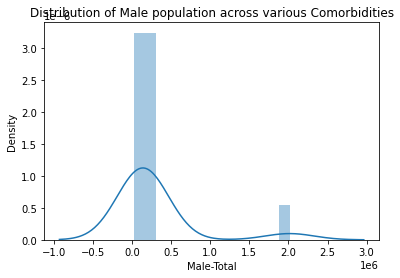

In [9]:
sns.distplot(df_comorbidities['Male-Total'])
plt.title("Distribution of Male population across various Comorbidities")

#### There are outliers that need to be handled during Model training.

### Gaussian/normal distribution of Female Comorbidities

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Female population across various Comorbidities')

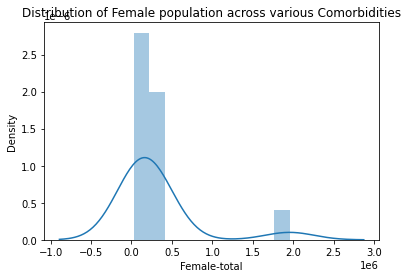

In [10]:
sns.distplot(df_comorbidities['Female-total'])
plt.title("Distribution of Female population across various Comorbidities")

#### There are outliers that need to be handled during Model training.

### Distribution of Comorbidities(Health-condition) across the total population


Text(0.5, 1.0, 'Distribution of Comorbidities across the total population')

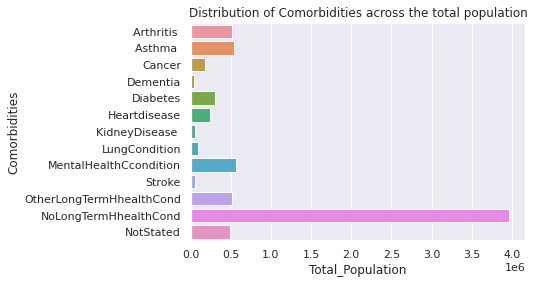

In [11]:
import seaborn as sns
sns.set()
sns.barplot(
    x = "Total_Population",
    y = df_comorbidities.index,
    data = df_comorbidities)
plt.title("Distribution of Comorbidities across the total population")



#### Most of the people are not having any long-term health conditions. 

#### Population affected by various comorbidities are showing the top three diseases that need more attention -Mental health condition, Arthritis & Asthma

## How the population is affected by comorbidities gender wise

In [12]:
#Selecting subset of data for plotting
df_comorbidities.loc[:, ['Total_Population', 'Male-Total','Female-total']]


,Total_Population,Male-Total,Female-total
Comorbidities,,,
Arthritis,518641,183276,335365
Asthma,543047,244002,299045
Cancer,179304,85362,93942
Dementia,45947,18233,27714
Diabetes,303361,165058,138303
Heartdisease,243140,147202,95938
KidneyDisease,57439,29516,27923
LungCondition,97268,46888,50380
MentalHealthCcondition,571147,218697,352450


#### Barplot Distribution of Comorbidities in Male and Female population


Text(0.5, 1.0, 'Distribution of Comorbidities in Male and Female population')

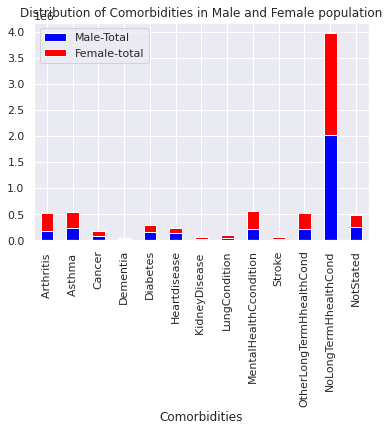

In [13]:
#Visualization of distribution
df_comorbidities.loc[:, ['Male-Total','Female-total']].plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title("Distribution of Comorbidities in Male and Female population")

#### Scatter plot distribution of Comorbidities(Health-condition) in Male and Female population

#### This is another way to plot the distribution.

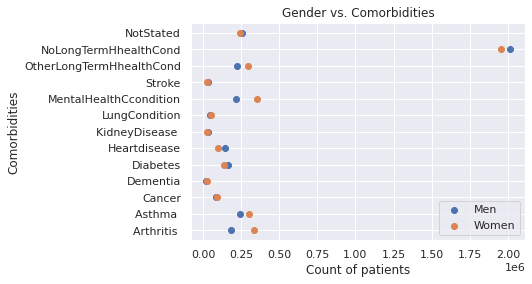

In [14]:
plt.title("Gender vs. Comorbidities")
plt.xlabel("Count of patients")
plt.ylabel("Comorbidities")
plt.scatter(df_comorbidities['Male-Total'], df_comorbidities.index, label="Men")
plt.scatter(df_comorbidities['Female-total'], df_comorbidities.index, label="Women")
plt.legend(loc='lower right')

####  Observation : 

####  - The above graphs show the female population is affected more than the male population by the top three comorbidities - Arthritis, Asthma & Mental health conditions.

####  - Male population is affected more than female population by heart disease and diabetes.

## Distribution of Comorbidities(Health-condition) in various age groups

#### Bar plot

In [15]:
#Reading dataset 
df_comorbidities_age_raw = pd.read_csv('comorbidities_age_analysis.csv')

# setting Comorbidities  as index column
df_comorbidities_age = df_comorbidities_age_raw.set_index("Comorbidities")
df_comorbidities_age

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85 years,Total
Comorbidities,,,,,,,,,,
Arthritis,858,"3,293","11,637","24,624","56,107","1,08,774","1,47,703","1,13,084","52,545","5,18,625"
Asthma,"74,452","67,333","87,461","82,130","70,847","62,836","55,144","31,506","11,336","5,43,045"
Cancer,"1,096","1,432","3,755","8,297","18,603","35,952","53,641","40,743","15,812","1,79,331"
Dementia,80,113,164,205,572,"1,679","5,857","16,232","21,041","45,943"
Diabetes,"1,785","3,941","9,034","20,919","39,381","66,764","84,590","56,999","19,955","3,03,368"
Heartdisease,"2,089","1,753","3,086","5,969","16,861","41,654","71,480","65,103","35,116","2,43,111"
KidneyDisease,"1,246","1,069","2,063","3,272","5,344","8,833","13,440","13,897","8,286","57,450"
LungCondition,"1,092",854,"1,619","3,076","7,940","18,364","29,306","24,675","10,352","97,278"
MentalHealthCcondition,"23,107","82,294","1,10,898","94,621","90,254","77,478","50,386","26,240","15,871","5,71,149"


In [16]:
#Changing the categorical to numeric
cols_age = df_comorbidities_age.columns
df_comorbidities_age[cols_age] = df_comorbidities_age[cols_age].replace({'\$': '', ',': ''}, regex=True)
df_comorbidities_age[cols_age] = df_comorbidities_age[cols_age].astype('int64')

In [17]:
df_comorbidities_age.columns

Index(['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years', 'Total'],
      dtype='object')

In [18]:
df_comorbidities_age.describe()

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85 years,Total
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,91299.076923,62351.692308,79888.615385,76419.153846,72615.615385,72176.076923,66265.461538,43268.538462,20367.615385,5.846518e+05
std,258453.846657,148680.504949,183427.385398,166063.005761,130743.498721,93963.475327,58482.112818,29707.317170,12280.863077,1.037520e+06
min,80.000000,113.000000,164.000000,205.000000,572.000000,1679.000000,5857.000000,13897.000000,8286.000000,4.594300e+04
25%,1092.000000,1069.000000,2063.000000,3272.000000,7940.000000,18364.000000,29306.000000,24675.000000,11336.000000,9.727800e+04
50%,1785.000000,3293.000000,9034.000000,20919.000000,39381.000000,53548.000000,53641.000000,31506.000000,15871.000000,3.033680e+05
75%,45011.000000,60985.000000,75553.000000,67444.000000,70847.000000,77478.000000,76926.000000,56999.000000,22486.000000,5.191080e+05
max,945340.000000,546938.000000,676524.000000,617573.000000,495448.000000,365070.000000,215966.000000,113084.000000,52545.000000,3.969500e+06


Text(0.5, 1.0, 'Distribution of Comorbidities in various age groups')

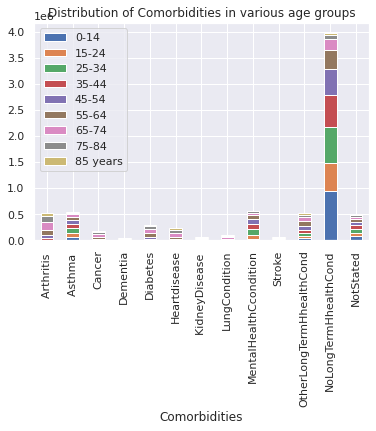

In [19]:
#Visualization of distribution using Barplot
df_comorbidities_age.loc[:, ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years']].plot(kind='bar', stacked=True)
plt.legend(loc='upper left')
plt.title("Distribution of Comorbidities in various age groups")


### Let's remove the population with "No long-term health condition" to get better distribution with comorbidities

In [20]:
update_df_comorbidities_age = df_comorbidities_age.drop('NoLongTermHhealthCond')

Text(0.5, 1.0, 'Distribution of Comorbidities in various age groups')

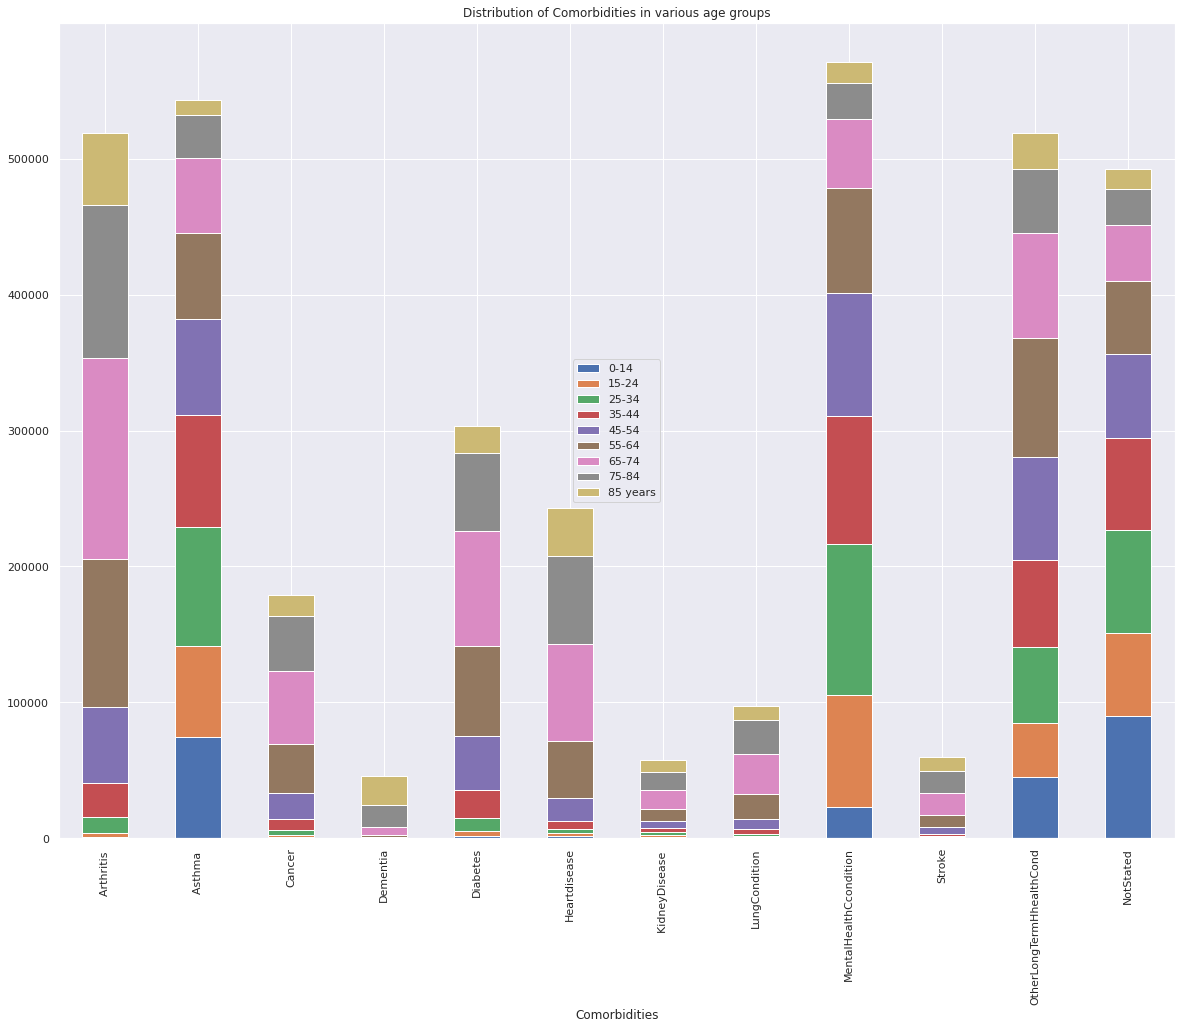

In [21]:
#df_comorbities_gender = df['Total', 'Male-Total', 'Female-Total']
update_df_comorbidities_age.loc[:, ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85 years']].plot(kind='bar', stacked=True, figsize=(20, 15))

plt.legend(loc='center')
plt.title("Distribution of Comorbidities in various age groups")
#, color=['blue', 'red']


#### The entire population is affected most by the Mental Health Conditions followed by Asthma and Arthritis

#### Children below 14 yrs are highly affected by Asthma & Mental Health Conditions 

#### Teens and young populations are mostly affected by Mental Health conditions followed by Asthma.

#### Middle aged population is also affected by Mental Health Conditions & Asthma mostly.

#### Senior citizens are mostly affected by Arthritis, Diabetes, and Heart disease. 

#### Below is another way of presenting the above distribution using a scatter plot which is showing the same observations as mentioned above.


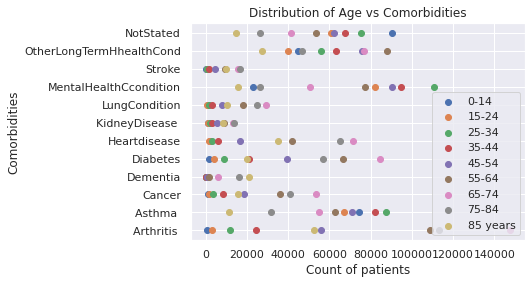

In [22]:
plt.title("Distribution of Age vs Comorbidities")
plt.xlabel("Count of patients")
plt.ylabel("Comorbidities")

plt.scatter(update_df_comorbidities_age['0-14'], update_df_comorbidities_age.index, label="0-14")
plt.scatter(update_df_comorbidities_age['15-24'], update_df_comorbidities_age.index, label="15-24")
plt.scatter(update_df_comorbidities_age['25-34'], update_df_comorbidities_age.index, label="25-34")
plt.scatter(update_df_comorbidities_age['35-44'], update_df_comorbidities_age.index, label="35-44")
plt.scatter(update_df_comorbidities_age['45-54'], update_df_comorbidities_age.index, label="45-54")
plt.scatter(update_df_comorbidities_age['55-64'], update_df_comorbidities_age.index, label="55-64")

plt.scatter(update_df_comorbidities_age['65-74'], update_df_comorbidities_age.index, label="65-74")
plt.scatter(update_df_comorbidities_age['75-84'], update_df_comorbidities_age.index, label="75-84")
plt.scatter(update_df_comorbidities_age['85 years'], update_df_comorbidities_age.index, label="85 years")
plt.legend(loc='lower right')

### Statistical Distribution of Comorbidities with various Age groups

In [23]:
df_comorbidities_stat = pd.read_csv('comorbidities_stat.csv')
# setting Comorbidities  as index column
df_comorbidities_stat.set_index("age", inplace = True)
df_comorbidities_stat

,Arthritis,Asthma,Cancer,Dementia,Diabetes,HeartDisease,KidneyDisease,LungCondition,MentalHealthCondition,Stroke,otherLongTermHealthCond,NoLongTermHealthCond,NotStated,Age-Total
age,,,,,,,,,,,,,,
0-14,858,"74,452","1,096",80,"1,785","2,089","1,246","1,092","23,107",403,"45,011","9,45,340","90,329","11,69,456"
15-24,"3,293","67,333","1,432",113,"3,941","1,753","1,069",854,"82,294",426,"40,141","5,46,938","60,985","7,73,536"
25-34,"11,637","87,461","3,755",164,"9,034","3,086","2,063","1,619","1,10,898",841,"55,917","6,76,524","75,553","9,75,493"
35-44,"24,624","82,130","8,297",205,"20,919","5,969","3,272","3,076","94,621","1,869","63,450","6,17,573","67,444","9,18,738"
45-54,"56,107","70,847","18,603",572,"39,381","16,861","5,344","7,940","90,254","4,757","75,706","4,95,448","62,183","8,26,885"
55-64,"1,08,774","62,836","35,952","1,679","66,764","41,654","8,833","18,364","77,478","9,268","88,069","3,65,070","53,548","7,46,547"
65-74,"1,47,703","55,144","53,641","5,857","84,590","71,480","13,440","29,306","50,386","15,652","76,926","2,15,966","41,360","6,05,557"
75-84,"1,13,084","31,506","40,743","16,232","56,999","65,103","13,897","24,675","26,240","16,613","46,775","84,155","26,469","3,44,801"
85 years,"52,545","11,336","15,812","21,041","19,955","35,116","8,286","10,352","15,871","10,026","27,113","22,486","14,840","1,42,475"


In [24]:
#Changing the categorical to numeric
cols_stat = df_comorbidities_stat.columns
df_comorbidities_stat[cols_stat] = df_comorbidities_stat[cols_stat].replace({'\$': '', ',': ''}, regex=True)
df_comorbidities_stat[cols_stat] = df_comorbidities_stat[cols_stat].astype('int64')

In [25]:
print(df_comorbidities_stat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0-14  to 85 years
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Arthritis                9 non-null      int64
 1   Asthma                   9 non-null      int64
 2   Cancer                   9 non-null      int64
 3   Dementia                 9 non-null      int64
 4   Diabetes                 9 non-null      int64
 5   HeartDisease             9 non-null      int64
 6   KidneyDisease            9 non-null      int64
 7   LungCondition            9 non-null      int64
 8   MentalHealthCondition    9 non-null      int64
 9   Stroke                   9 non-null      int64
 10  otherLongTermHealthCond  9 non-null      int64
 11  NoLongTermHealthCond     9 non-null      int64
 12  NotStated                9 non-null      int64
 13  Age-Total                9 non-null      int64
dtypes: int64(14)
memory usage: 1.1+ KB
None


### Let's see the summary statistic of total population under each  comorbidity across various age groups

In [26]:
df_comorbidities_stat.describe()

,Arthritis,Asthma,Cancer,Dementia,Diabetes,HeartDisease,KidneyDisease,LungCondition,MentalHealthCondition,Stroke,otherLongTermHealthCond,NoLongTermHealthCond,NotStated,Age-Total
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,57625.000000,60338.333333,19925.666667,5104.777778,33707.555556,27012.333333,6383.333333,10808.666667,63461.000000,6650.555556,57678.666667,441055.555556,54745.666667,7.226098e+05
std,53866.151649,24583.582840,19166.665503,7978.184815,29839.136826,27581.396402,4999.161930,10826.475084,35248.846573,6485.539166,19926.797792,298767.011974,23788.789891,3.180261e+05
min,858.000000,11336.000000,1096.000000,80.000000,1785.000000,1753.000000,1069.000000,854.000000,15871.000000,403.000000,27113.000000,22486.000000,14840.000000,1.424750e+05
25%,11637.000000,55144.000000,3755.000000,164.000000,9034.000000,3086.000000,2063.000000,1619.000000,26240.000000,841.000000,45011.000000,215966.000000,41360.000000,6.055570e+05
50%,52545.000000,67333.000000,15812.000000,572.000000,20919.000000,16861.000000,5344.000000,7940.000000,77478.000000,4757.000000,55917.000000,495448.000000,60985.000000,7.735360e+05
75%,108774.000000,74452.000000,35952.000000,5857.000000,56999.000000,41654.000000,8833.000000,18364.000000,90254.000000,10026.000000,75706.000000,617573.000000,67444.000000,9.187380e+05
max,147703.000000,87461.000000,53641.000000,21041.000000,84590.000000,71480.000000,13897.000000,29306.000000,110898.000000,16613.000000,88069.000000,945340.000000,90329.000000,1.169456e+06


### Statistical distribution of Asthma in various age groups

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



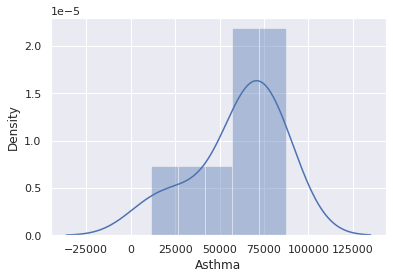

In [27]:
sns.distplot(df_comorbidities_stat['Asthma'])

### Statistical distribution of Cancer in various age groups

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



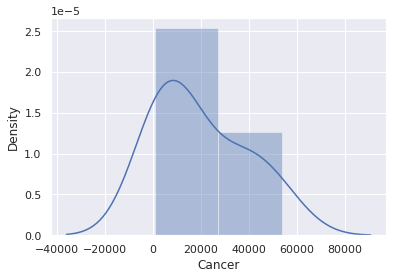

In [28]:
sns.distplot(df_comorbidities_stat['Cancer'])

### Statistical distribution of Diabetes in various age groups

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



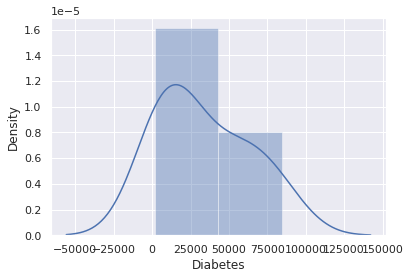

In [29]:
sns.distplot(df_comorbidities_stat['Diabetes'])

### Statistical distribution of Mental-health-condition in various age groups

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



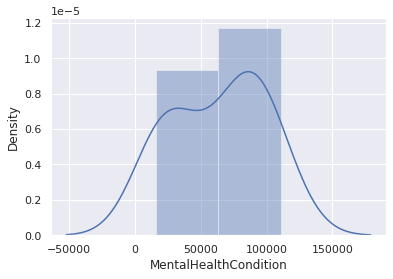

In [30]:
sns.distplot(df_comorbidities_stat['MentalHealthCondition'])

In [31]:
df_comorbidities_stat.columns

Index(['Arthritis', 'Asthma', 'Cancer', 'Dementia', 'Diabetes', 'HeartDisease',
       'KidneyDisease', 'LungCondition', 'MentalHealthCondition', 'Stroke',
       'otherLongTermHealthCond', 'NoLongTermHealthCond', 'NotStated',
       'Age-Total'],
      dtype='object')

### Statistical distribution of Kidney-Disease in various age groups

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



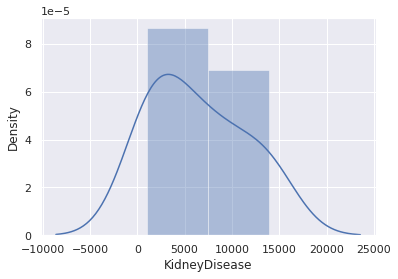

In [32]:
sns.distplot(df_comorbidities_stat['KidneyDisease'])

## Imbalance 

#### Imbalance means the observed frequencies are very different across the different possible values of a categorical variable. Basically, the feature will have one class with many observations and very few of another type.

An imbalance check is important to detect bias in the population data.
For example - if there is an imbalance in the female and male distribution in any disease with females present> 80% - it may indicate bias in the healthcare system. So before taking the decision about the biological effect we should drill down the other attributes and data.

In [33]:
df_comorbidities.head(3)

,Total_Population,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
Comorbidities,,,,,,,,,,,,,,,,,,,,,
Arthritis,518641,183276,410,1255,4859,9836,20218,38927,52812,39517,...,335365,447,2041,6777,14795,35893,69851,94887,73573,37101
Asthma,543047,244002,45210,33478,38793,36650,29228,24778,20611,11553,...,299045,29239,33855,48672,45483,41617,38055,34529,19959,7636
Cancer,179304,85362,618,758,1719,3080,6378,15458,27387,22150,...,93942,478,667,2030,5210,12221,20493,26255,18593,7995


#### Percentage Distribution of comorbidities in total population 

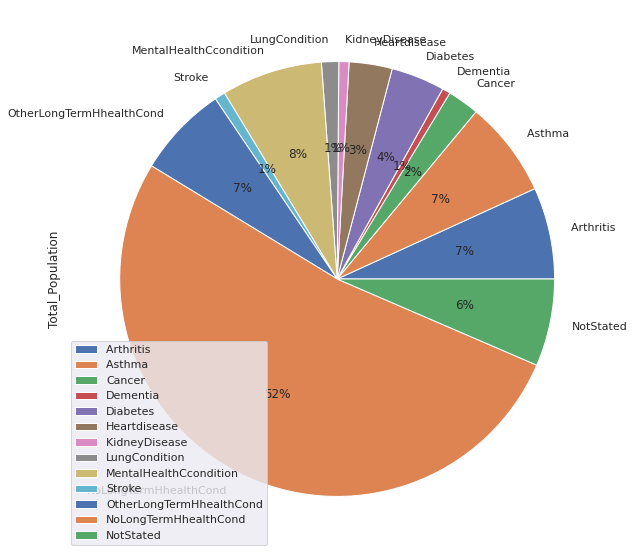

In [34]:

plot = df_comorbidities.plot.pie(y='Total_Population', autopct='%.0f%%',figsize=(28, 10))

## Identifying Age imbalance in top three Comorbidities 



In [35]:
df_comorbidities_stat.columns

Index(['Arthritis', 'Asthma', 'Cancer', 'Dementia', 'Diabetes', 'HeartDisease',
       'KidneyDisease', 'LungCondition', 'MentalHealthCondition', 'Stroke',
       'otherLongTermHealthCond', 'NoLongTermHealthCond', 'NotStated',
       'Age-Total'],
      dtype='object')

In [36]:
#creating the test data set with top three Comorbidities
df_comorb_age_imb = df_comorbidities_stat.loc[:, ['Arthritis', 'Asthma', 'MentalHealthCondition']]

### First checking the Percentage Distribution of age groups in population affected by Arthritis

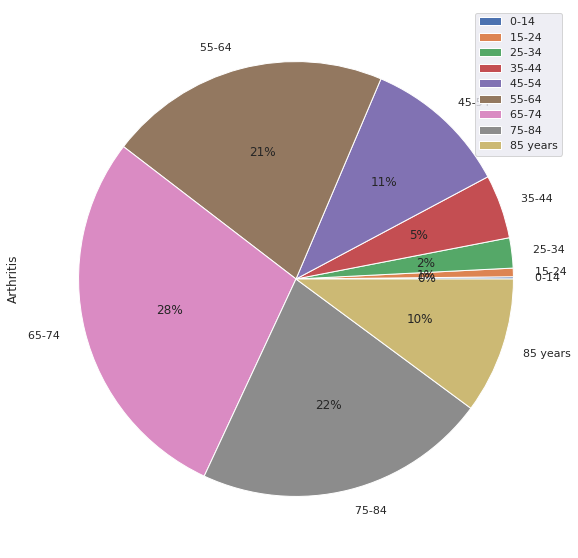

In [37]:
plot = df_comorbidities_stat.loc[:, ['Arthritis']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(15, 10))

### As per the above distribution, if we classify the age groups into < 45 yrs and > 45 yrs, Arthritis will show less  presence in the lower age group (<45 yrs).

#### Arthritis is affecting the aged people the most.

#### We have to handle imbalance if we fit any model with this class and features.

### Now we will check the Percentage Distribution of age groups in population affected by Asthma

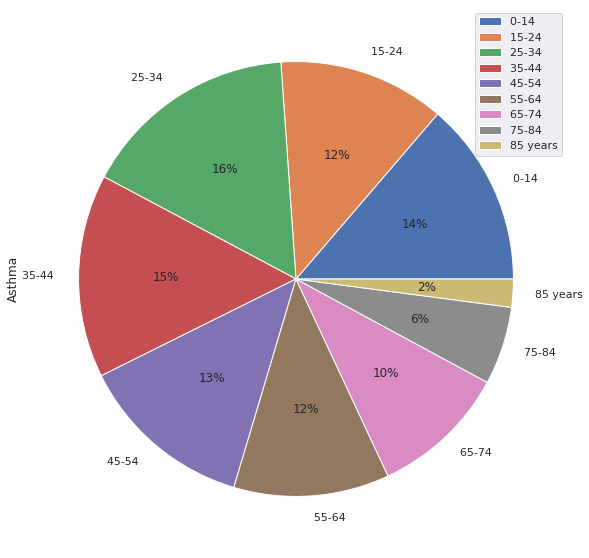

In [38]:
plot = df_comorbidities_stat.loc[:, ['Asthma']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(15, 10))

### As per the above distribution, if we classify the age groups into < 65 yrs and > 65 yrs, Asthma will show less  presence in the senior citizens.

#### And we should be worried that Asthma is affecting the children and middle aged population a lot.

#### We have to handle imbalance if we fit any model with this class and features.

### Now we will check the Percentage Distribution of age groups in population affected by Mental Health Condition

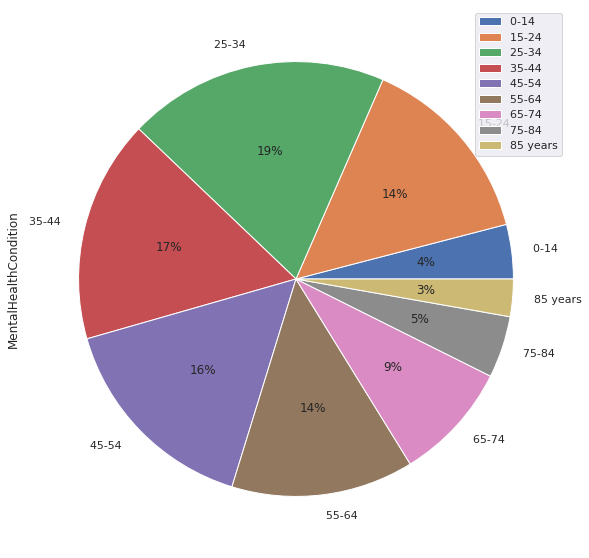

In [39]:

plot = df_comorbidities_stat.loc[:, ['MentalHealthCondition']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(15, 10))

### As per the above distribution, mental health conditions are affecting middle-aged people the most.

#### The senior citizens and children below 14 yrs are showing fewer symptoms of mental health conditions. Hence in these age groups, the disease is not present in equal proportion as in the middle age group.

### Identifying Gender imbalance in Comorbidities 

We will check if male and female populations are present in imbalanced proportion or not. Generally, if any class is present in < 20% of the total population compared to other is called an imbalanced class.

#### - We will focus on the top three health conditions as found before in this analysis: Arthritis, Asthma & Mental health conditions.

In [40]:
df_comorbidities.head(2)

,Total_Population,Male-Total,M_0-14,M_15-24,M_25-34,M_35-44,M_45-54,M_55-64,M_65-74,M_75-84,...,Female-total,F_0-14,F_15-24,F_25-34,F_35-44,F_45-54,F_55-64,F_65-74,F_75-84,F_85
Comorbidities,,,,,,,,,,,,,,,,,,,,,
Arthritis,518641,183276,410,1255,4859,9836,20218,38927,52812,39517,...,335365,447,2041,6777,14795,35893,69851,94887,73573,37101
Asthma,543047,244002,45210,33478,38793,36650,29228,24778,20611,11553,...,299045,29239,33855,48672,45483,41617,38055,34529,19959,7636


In [41]:
#Selecting dataset for gender imbalance
df_gender_imbalance = df_comorbidities.loc[:, ['Male-Total','Female-total']]

In [42]:
df_gender = df_gender_imbalance.transpose()

In [43]:
df_gender.columns

Index(['Arthritis ', 'Asthma ', 'Cancer', 'Dementia', 'Diabetes',
       'Heartdisease', 'KidneyDisease ', 'LungCondition',
       'MentalHealthCcondition', 'Stroke', 'OtherLongTermHhealthCond',
       'NoLongTermHhealthCond', 'NotStated'],
      dtype='object', name='Comorbidities')

### Checking the male and female distribution in Asthma

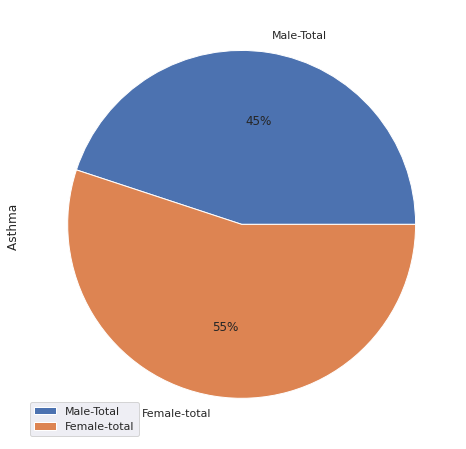

In [44]:
plot = df_gender.loc[:, ['Asthma ']].plot.pie(subplots=True, autopct='%.0f%%',figsize=(15, 8))

####  45% male population and 55% female population affected by Asthma. Hence, no imbalance observed in this distribution.

### Checking the male and female distribution in Arthritis

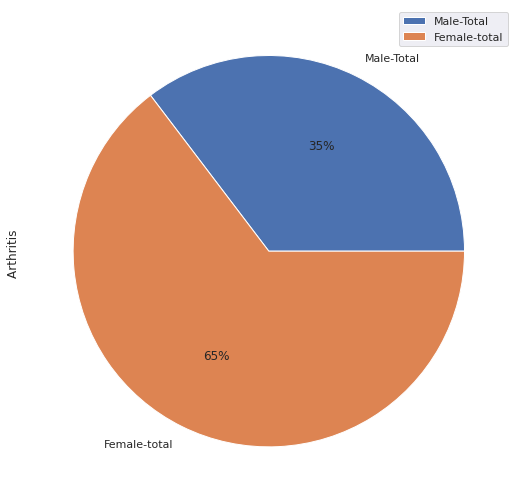

In [45]:
plot = df_gender.loc[:, ['Arthritis ']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(15, 9))

####  35% male population and 65% female population affected by Arthritis. Hence, no imbalance observed in this distribution.

### Checking the male and female distribution in Mental Health Condition

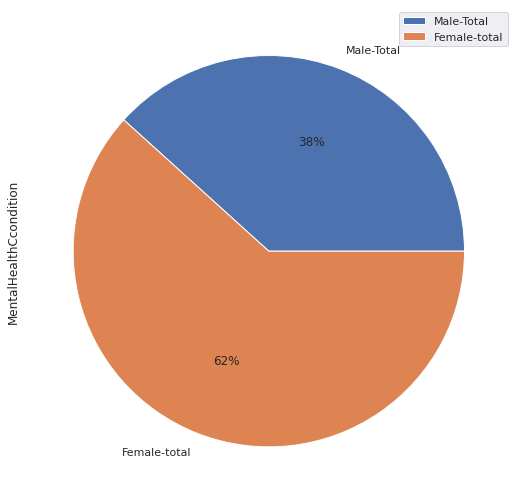

In [46]:
plot = df_gender.loc[:, ['MentalHealthCcondition']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(15, 9))

####  38% male population and 62% female population affected by Mental Health Condition. Hence, no imbalance observed in this distribution.

### Checking the male and female distribution in other  disease - Cancers 

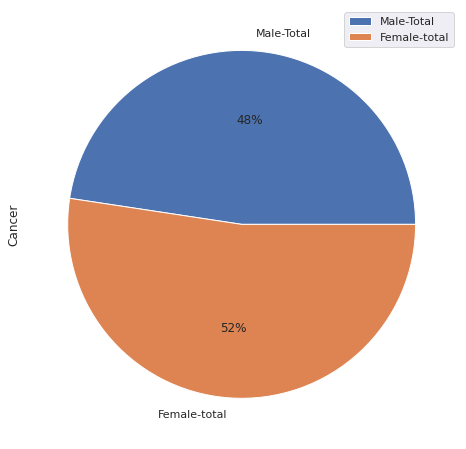

In [47]:
plot = df_gender.loc[:, ['Cancer']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(18, 8))

####  48% male population and 52% female population affected by Mental Health Condition. Hence, no imbalance observed in this distribution.

### Checking the male and female distribution in other two disease - Kidney disease 

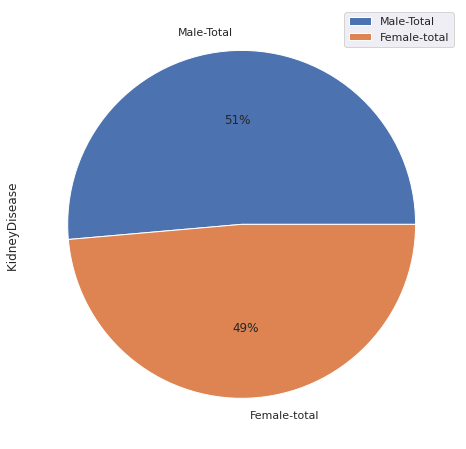

In [48]:
plot = df_gender.loc[:, ['KidneyDisease ']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(18, 8))

####  51% male population and 49% female population affected by Mental Health Condition. Hence, no imbalance observed in this distribution.

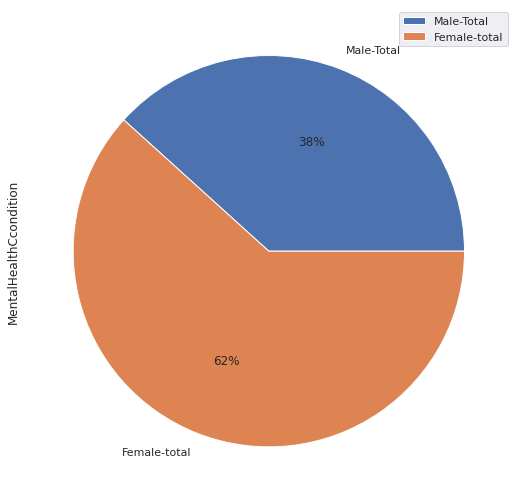

In [49]:
plot = df_gender.loc[:, ['MentalHealthCcondition']].plot.pie(subplots=True, autopct='%.0f%%', figsize=(18, 9))

####  38% male population and 62% female population affected by Mental Health Condition. Hence, no imbalance observed in this distribution.